In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/dataset_clean.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  term                       148670 non-null  float64
 11  Neg_ammortization          148670 non-null  object 
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

In [ ]:
x = data.drop('Status', axis=1)
y = data['Status']
categorical_cols = [col for col in x.columns if x[col].dtype == 'object']
numerical_cols = [col for col in x.columns if x[col].dtype != 'object']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', MinMaxScaler(), numerical_cols)
    ],
    remainder='drop'
)

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, f1_score, precision_score, recall_score, roc_curve
)

In [ ]:
model = Pipeline(steps=[
    ('classifier', LogisticRegression(
        solver='lbfgs',
        max_iter=500,
        random_state=42
    ))
])

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
print("\n=====Logistic Regression - Evaluation Metrics =====")
print(f"Accuracy:         {acc:.4f}")
print(f"F1 (macro):       {f1_macro:.4f}")
print(f"F1 (micro):       {f1_micro:.4f}")
print(f"F1 (weighted):    {f1_weighted:.4f}")
print(f"Precision (macro):{precision_macro:.4f}")
print(f"Recall (macro):   {recall_macro:.4f}")
print(f"ROC-AUC:          {roc_auc:.4f}")


=====Logistic Regression - Evaluation Metrics =====
Accuracy:         0.8695
F1 (macro):       0.7857
F1 (micro):       0.8695
F1 (weighted):    0.8537
Precision (macro):0.9048
Recall (macro):   0.7436
ROC-AUC:          0.8341


In [ ]:
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred, digits=4))


===== Classification Report =====
              precision    recall  f1-score   support

           0     0.8573    0.9919    0.9197     22406
           1     0.9523    0.4954    0.6517      7328

    accuracy                         0.8695     29734
   macro avg     0.9048    0.7436    0.7857     29734
weighted avg     0.8807    0.8695    0.8537     29734



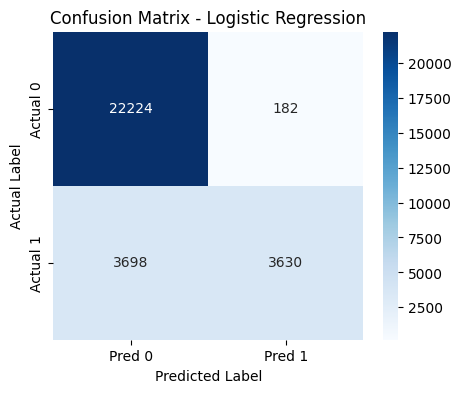

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

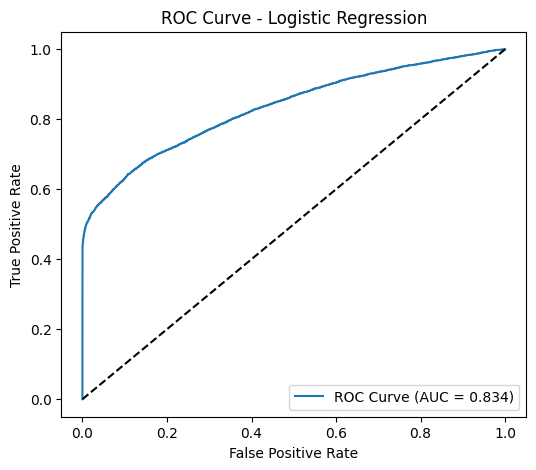

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib
from google.colab import files

final_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', LogisticRegression(
        solver='lbfgs',
        max_iter=500,
        random_state=42
    ))
])

final_pipeline.fit(x, y)

joblib.dump(final_pipeline, "loan_default_model_logistic.pkl")

files.download("loan_default_model_logistic.pkl")

print("Mô hình đã được lưu và tải về thành công:loan_default_model_logistic.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mô hình đã được lưu và tải về thành công:loan_default_model_logistic.pkl
